# Geração do modelo treinado

In [1]:
# Treino do modelo com hiperparâmetros selecionados
from utils import Experimento

params = {
    'env_id': 'CartPole-v1',
    'n_envs': 1,
    'size': [64, 64],
    'fib_seeds': [0],
    'timesteps': int(1e5),
    'recording': False,
    'device': 'cpu',
    'n_steps': 1024,
    'vf_coef': 1,
    'ent_coef': 1,
    'coleta': False
}
#todo: alguns ambientes tem condições adicionais, como lidar?
#todo: carregar os parâmetros no PPO

teste = Experimento(params)
teste.treinamento()

# Teste: extração de gradiente

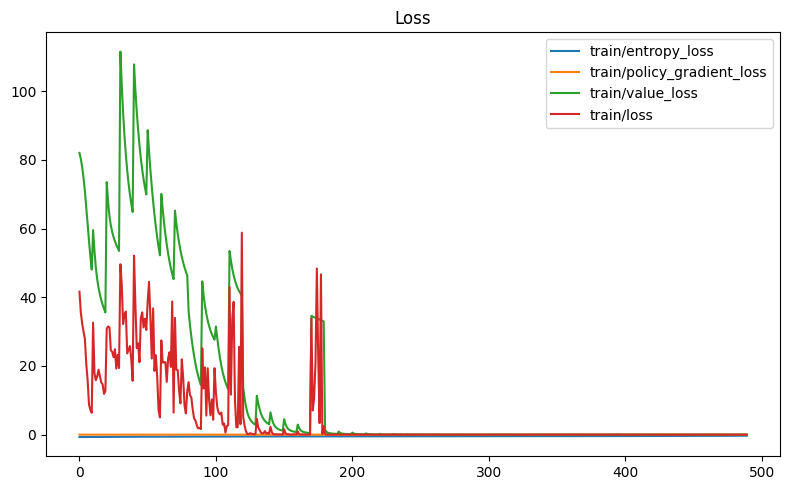

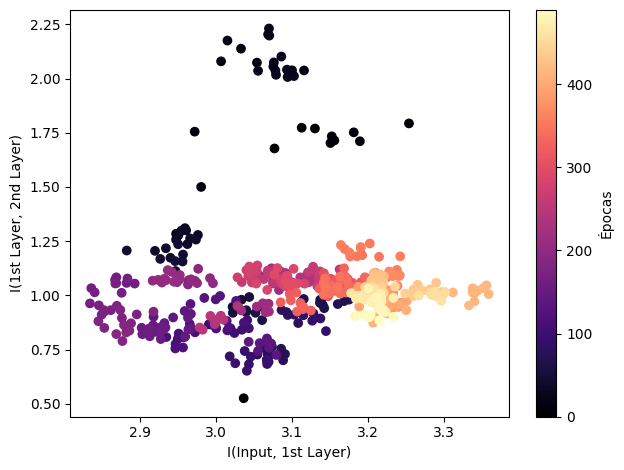

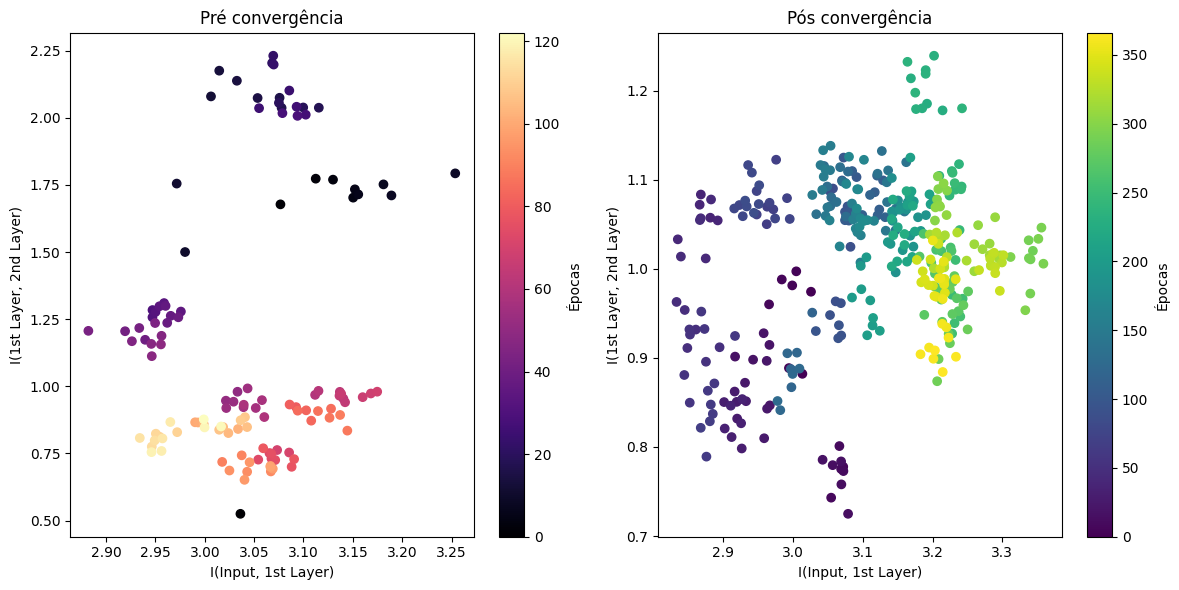

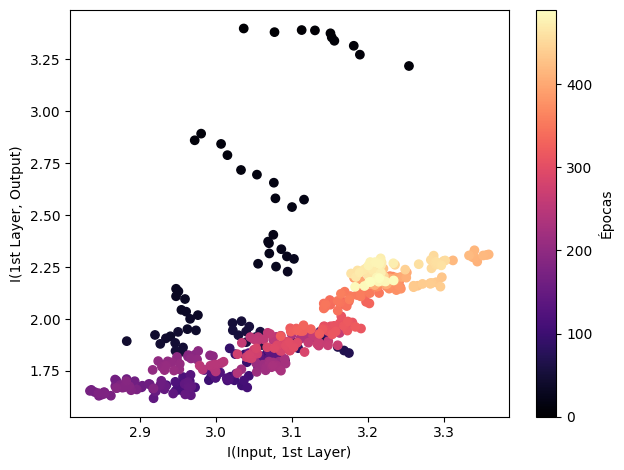

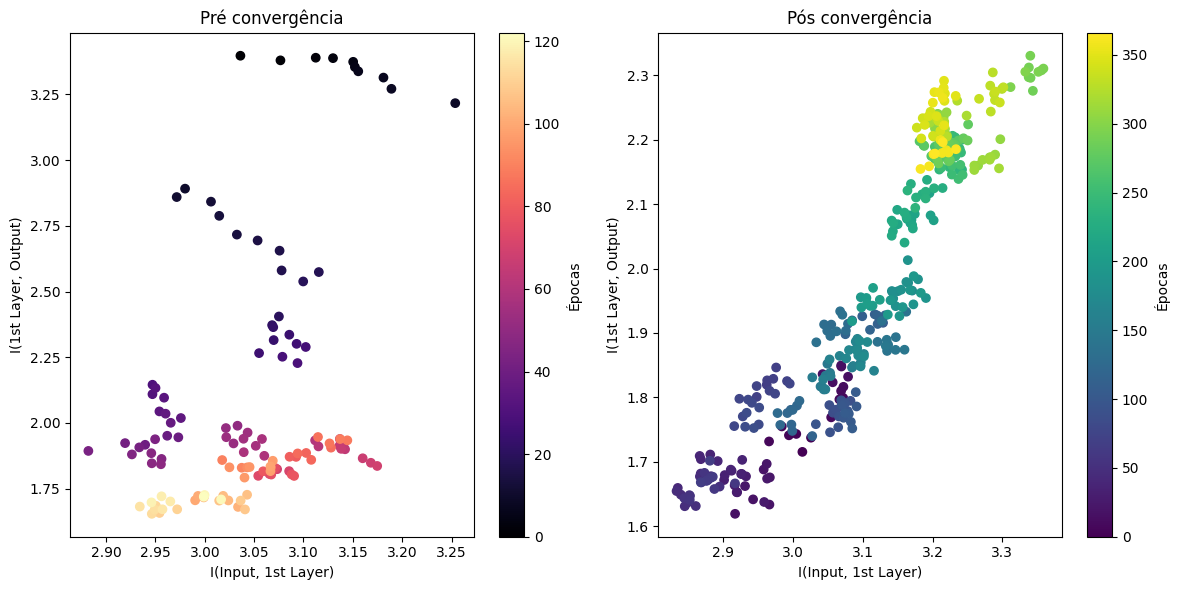

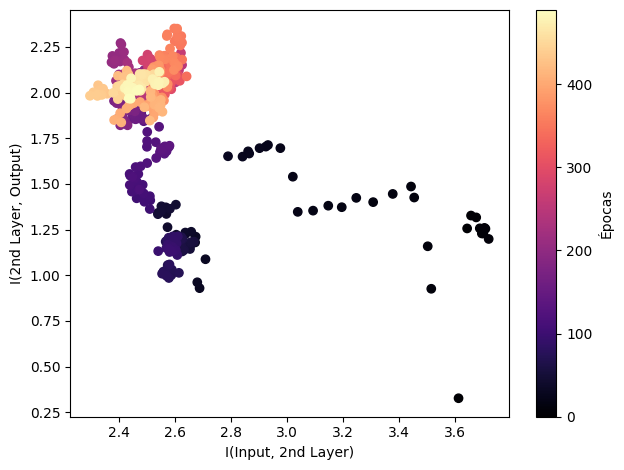

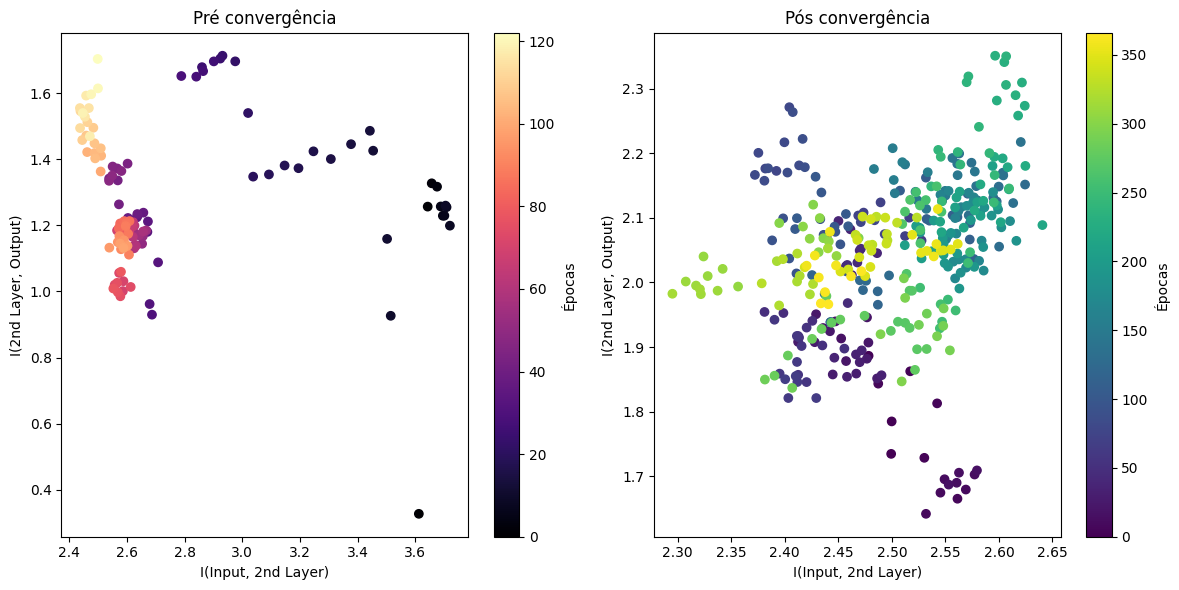

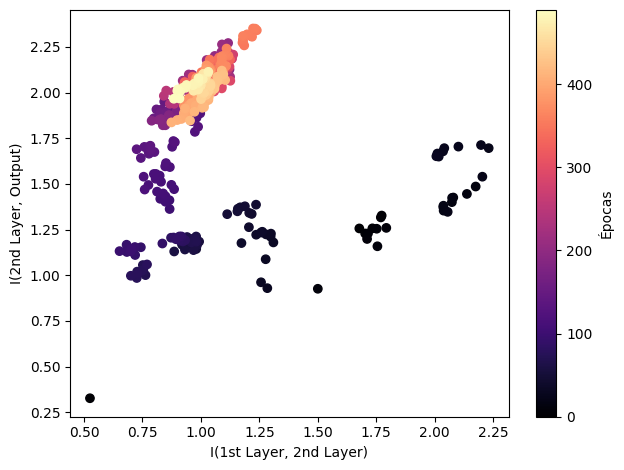

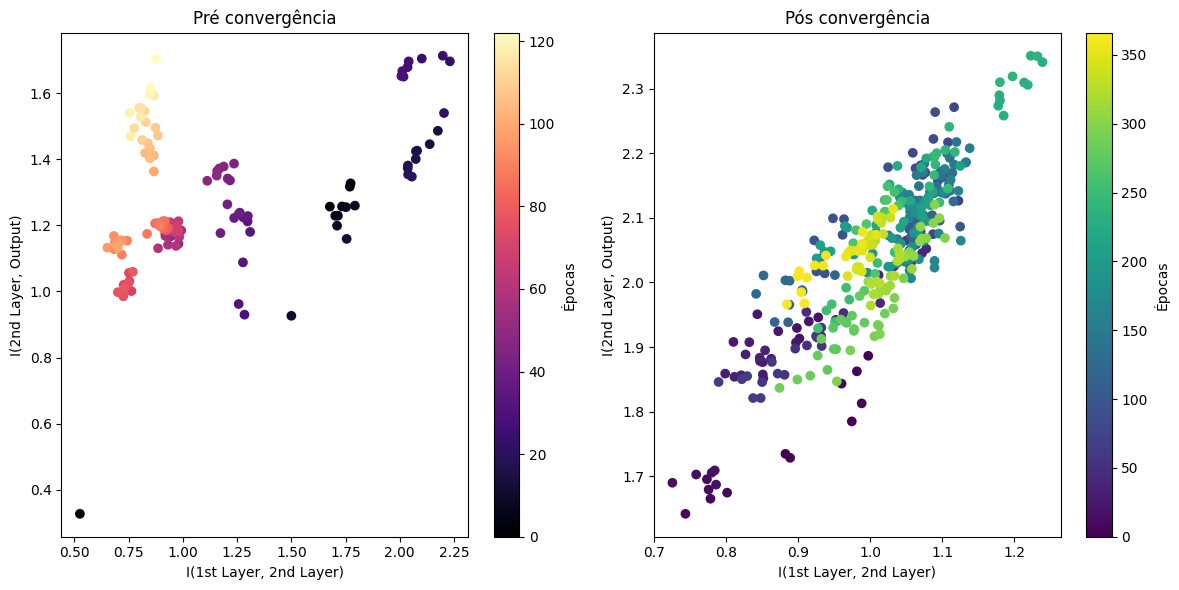

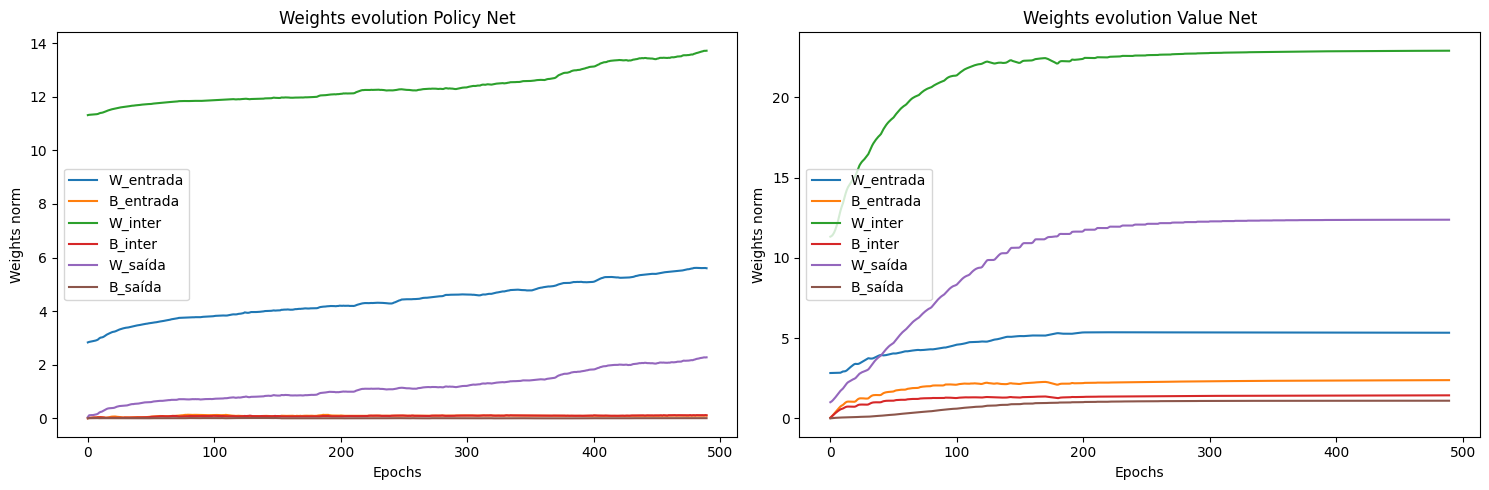

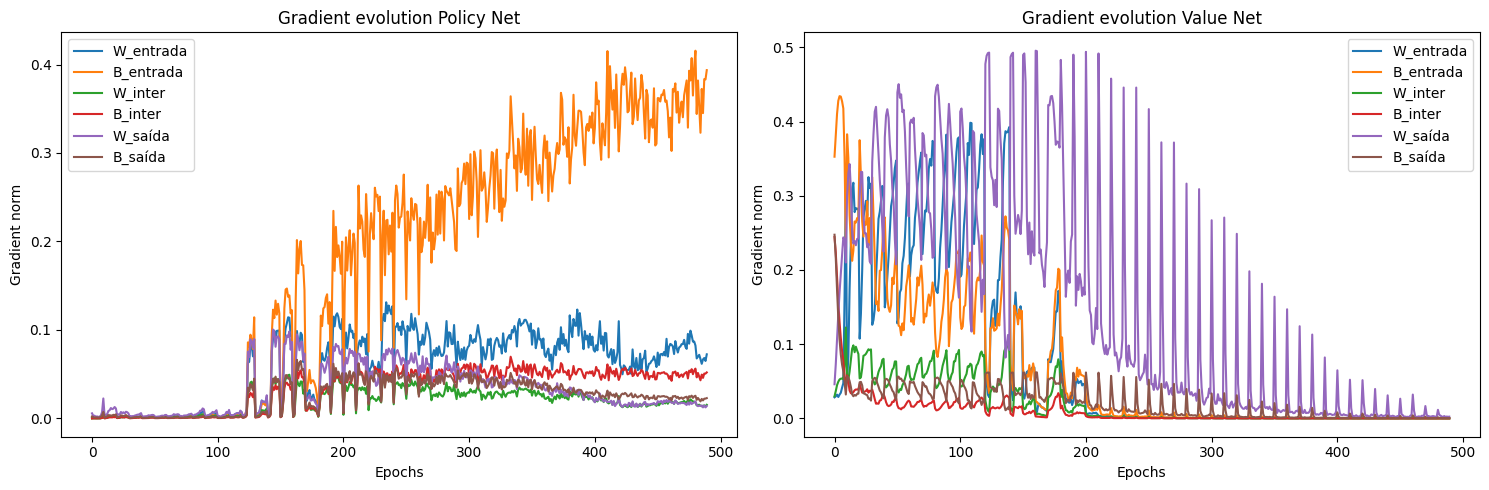

In [4]:
#todo: indicar qual gradiente pertece a qual camada automaticamente -> net diferente de 2 camadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

direc = 'resultados.csv'
data = pd.read_csv(direc)
drop_list = ['n_updates', 'learning_rate', 'range']
for i in drop_list:
    data.drop(data.filter(like = i), axis= 1, inplace= True) #type: ignore
loss_data = data.filter(like= 'loss')
grad_data = data.filter(like= 'layer')
mutual_data = data.filter(like = 'mutual')
data.drop(loss_data, axis = 1, inplace= True) #type: ignore
data.drop(grad_data, axis = 1, inplace= True) #type: ignore
data.drop(mutual_data, axis = 1, inplace= True) #type: ignore

loss_data.plot(title= 'Loss', figsize = (8,5))
plt.tight_layout()
plt.show()



lista = [['train/mutual_info_0','train/mutual_info_2', 'I(Input, 1st Layer)', 'I(1st Layer, 2nd Layer)', 'In-1st-2nd'], 
         ['train/mutual_info_0','train/mutual_info_3', 'I(Input, 1st Layer)', 'I(1st Layer, Output)', 'In-1st-Out'], 
         ['train/mutual_info_1','train/mutual_info_4', 'I(Input, 2nd Layer)', 'I(2nd Layer, Output)', 'Input-2nd-Out'],
         ['train/mutual_info_2','train/mutual_info_4', 'I(1st Layer, 2nd Layer)', 'I(2nd Layer, Output)', '1st-2nd-Out']]

# valor arbirário pra indicar convergência
limit = np.where(loss_data['train/loss'] < 0.25)[0][0]

for i in lista:   
    # Vou deixar o dado completo e o separado 
    plt.scatter(x= mutual_data[i[0]],y= mutual_data[i[1]], c= np.arange(0, len(mutual_data['train/mutual_info_0'])), cmap= 'magma')
    plt.xlabel(i[2])
    plt.ylabel(i[3])
    plt.colorbar(label='Épocas')
    plt.tight_layout()
    plt.savefig(f'Plots/{i[4]}.jpg')
    plt.show()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with 1 row, 2 columns
    colors = np.arange(0, len(mutual_data[i[0]][:limit]))  # Assuming same length for all data
    scatter1 = ax1.scatter(x=mutual_data[i[0]][:limit], y=mutual_data[i[1]][:limit], c=colors, cmap='magma')
    ax1.set_xlabel(i[2])
    ax1.set_ylabel(i[3])
    ax1.set_title('Pré convergência')
    colorbar1 = plt.colorbar(scatter1, ax=ax1, label='Épocas')

    colors = np.arange(0, len(mutual_data[i[0]][limit:]))  # Assuming same length for all data
    scatter2 = ax2.scatter(x=mutual_data[i[0]][limit:], y=mutual_data[i[1]][limit:], c=colors, cmap='viridis')
    ax2.set_xlabel(i[2])
    ax2.set_ylabel(i[3])
    ax2.set_title('Pós convergência')

    colorbar2 = plt.colorbar(scatter2, ax=ax2, label='Épocas')
    plt.tight_layout()
    plt.show()

indice_policy = [0,1,2,3,8,9]
indice_value = [4,5,6,7,10,11]
policy_data = grad_data.filter(items=[f'train/weights_layer_{i}' for i in indice_policy])
value_data = grad_data.filter(items=[f'train/weights_layer_{i}' for i in indice_value])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
ax1.plot(policy_data)
ax1.set_title('Weights evolution Policy Net')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Weights norm')
ax1.legend(['W_entrada', 'B_entrada',
            'W_inter', 'B_inter',
            'W_saída', 'B_saída'
            ])

# Plotando os dados no segundo subplot
ax2.plot(value_data)
ax2.set_title('Weights evolution Value Net')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Weights norm')
ax2.legend(['W_entrada', 'B_entrada',
            'W_inter', 'B_inter',
            'W_saída', 'B_saída'
            ])
plt.tight_layout()
plt.savefig('Plots/Grad_evolution.png')
plt.show()

policy_data = grad_data.filter(items=[f'train/gradient_layer_{i}' for i in indice_policy])
value_data = grad_data.filter(items=[f'train/gradient_layer_{i}' for i in indice_value])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
# Plotando os dados no primeiro subplot
ax1.plot(policy_data)
ax1.set_title('Gradient evolution Policy Net')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Gradient norm')
ax1.legend(['W_entrada', 'B_entrada',
            'W_inter', 'B_inter',
            'W_saída', 'B_saída'
            ])

# Plotando os dados no segundo subplot
ax2.plot(value_data)
ax2.set_title('Gradient evolution Value Net')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Gradient norm')
ax2.legend(['W_entrada', 'B_entrada',
            'W_inter', 'B_inter',
            'W_saída', 'B_saída'
            ])
plt.tight_layout()
plt.savefig('Plots/Grad_evolution.png')
plt.show()



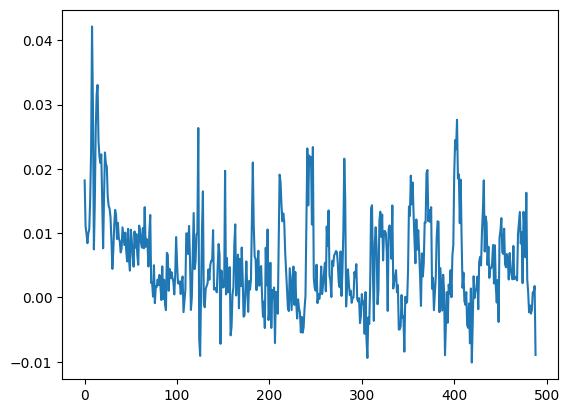

In [23]:
a = policy_data['train/gradient_layer_0'].to_numpy()
b = np.insert(a,0,0)
plt.plot(a[1:] - b[1:-1])

(0, 'train/learning_rate')
(1, 'train/mutual_info_0')
(2, 'train/mutual_info_1')
(3, 'train/mutual_info_2')
(4, 'train/mutual_info_3')
(5, 'train/mutual_info_4')
(6, 'train/entropy_loss')
(7, 'train/policy_gradient_loss')
(8, 'train/value_loss')
(9, 'train/approx_kl')
(10, 'train/clip_fraction')
(11, 'train/loss')
(12, 'train/gradient_layer_0')
(13, 'train/gradient_layer_1')
(14, 'train/gradient_layer_2')
(15, 'train/gradient_layer_3')
(16, 'train/gradient_layer_4')
(17, 'train/gradient_layer_5')
(18, 'train/gradient_layer_6')
(19, 'train/gradient_layer_7')
(20, 'train/gradient_layer_8')
(21, 'train/gradient_layer_9')
(22, 'train/gradient_layer_10')
(23, 'train/gradient_layer_11')
(24, 'train/n_updates')
(25, 'train/clip_range')


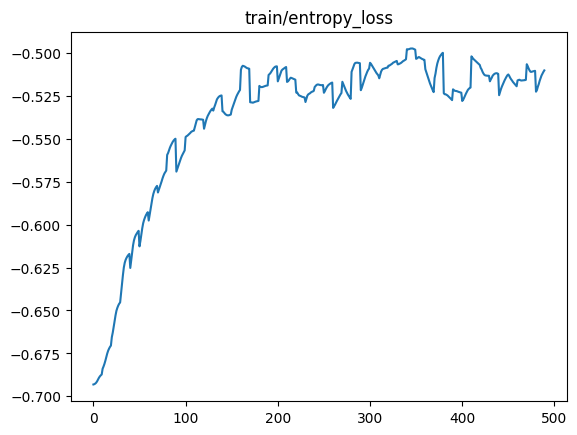

In [6]:
df = pd.read_csv('resultados.csv')
lista = df.columns.to_list()
for j in enumerate(lista):
    print(j)
index = 6

df[lista[index]].plot( title= lista[index])
plt.show()

# Extração de informações

In [7]:
teste.visualizar_modelo()

In [8]:
teste.coleta_dado(100)

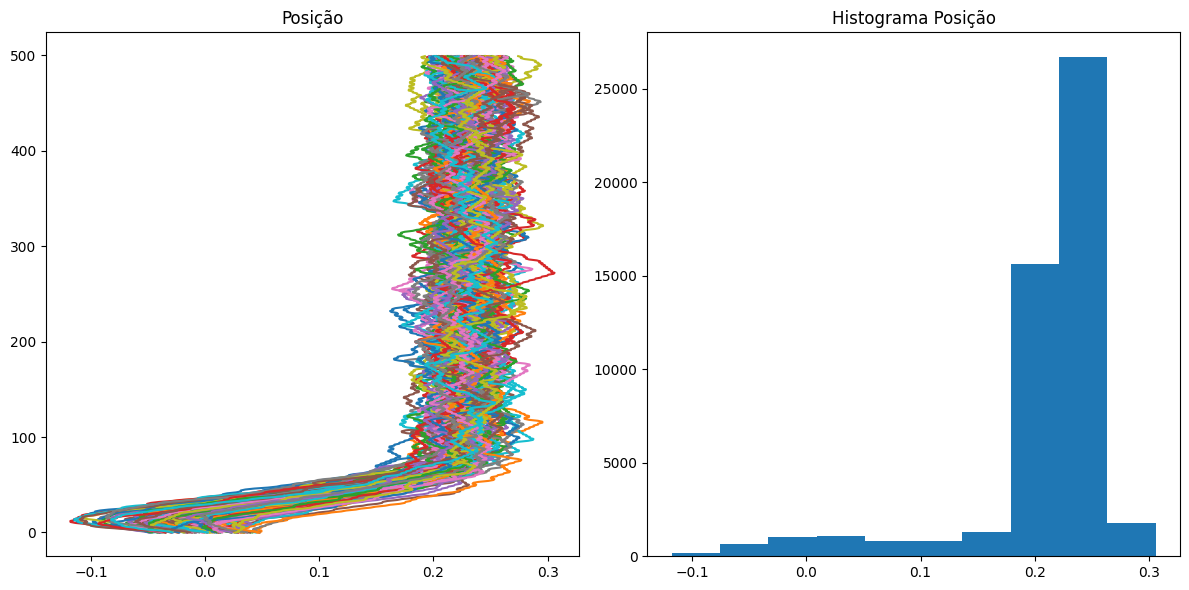

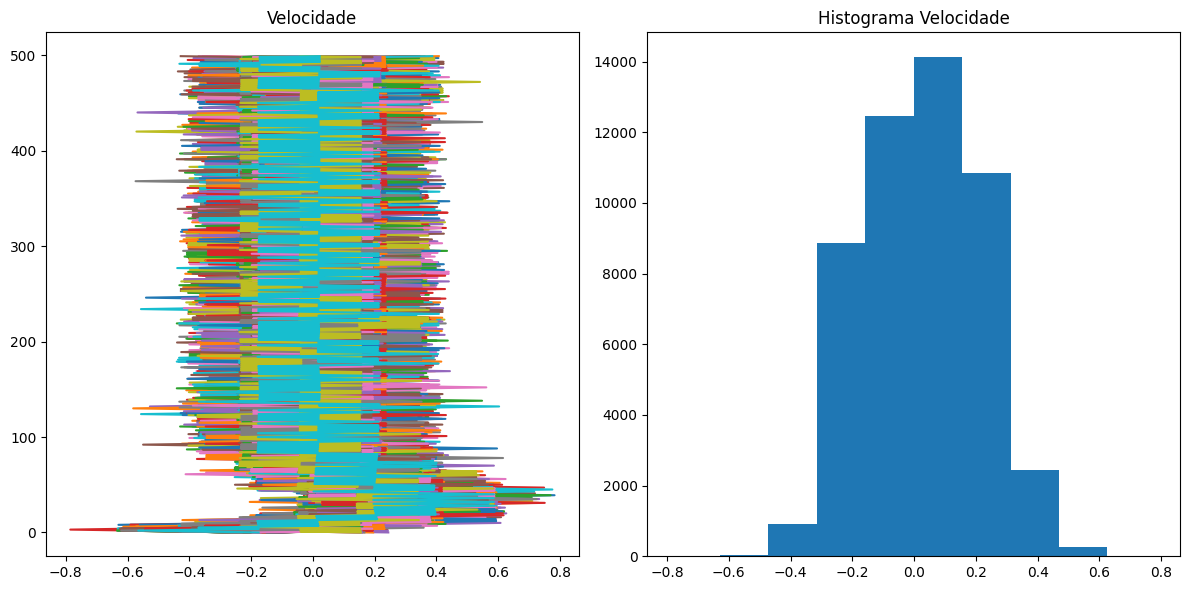

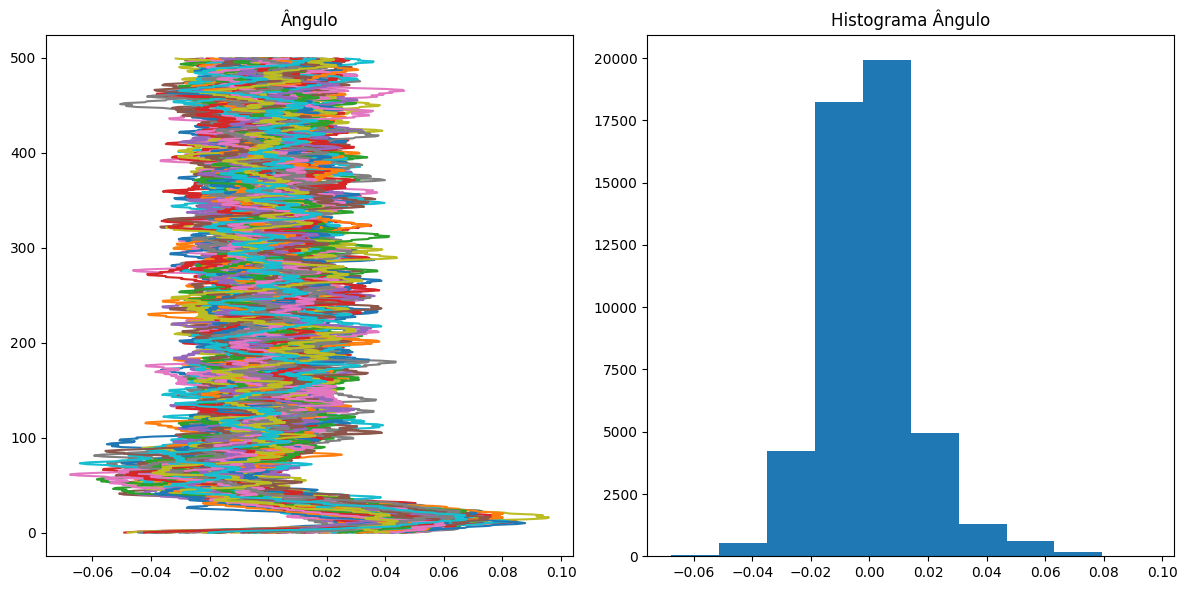

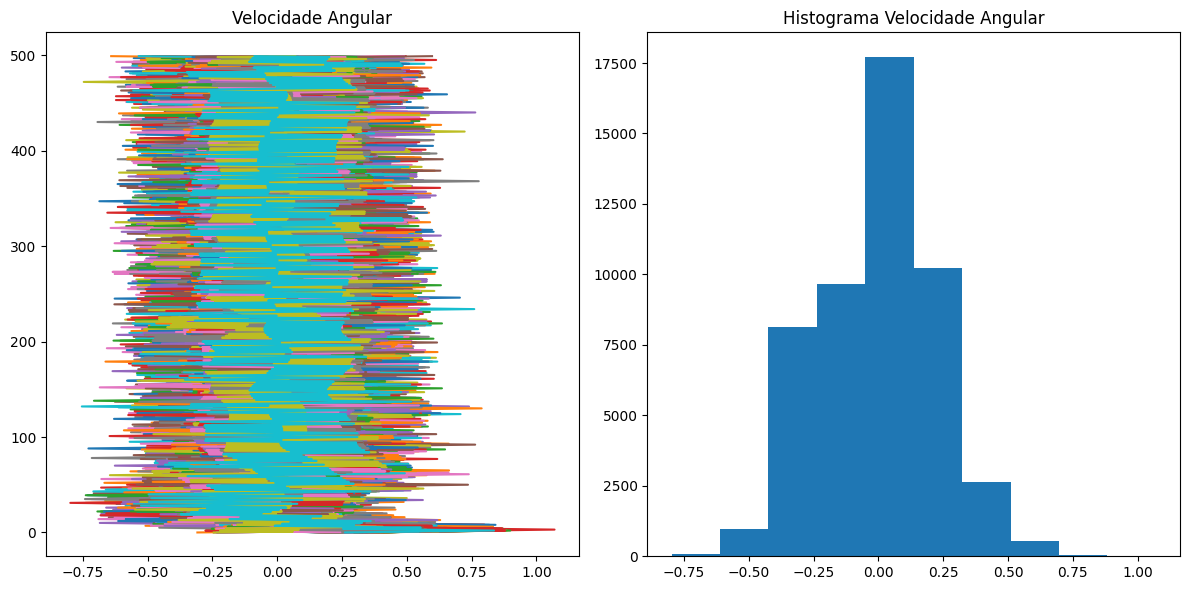

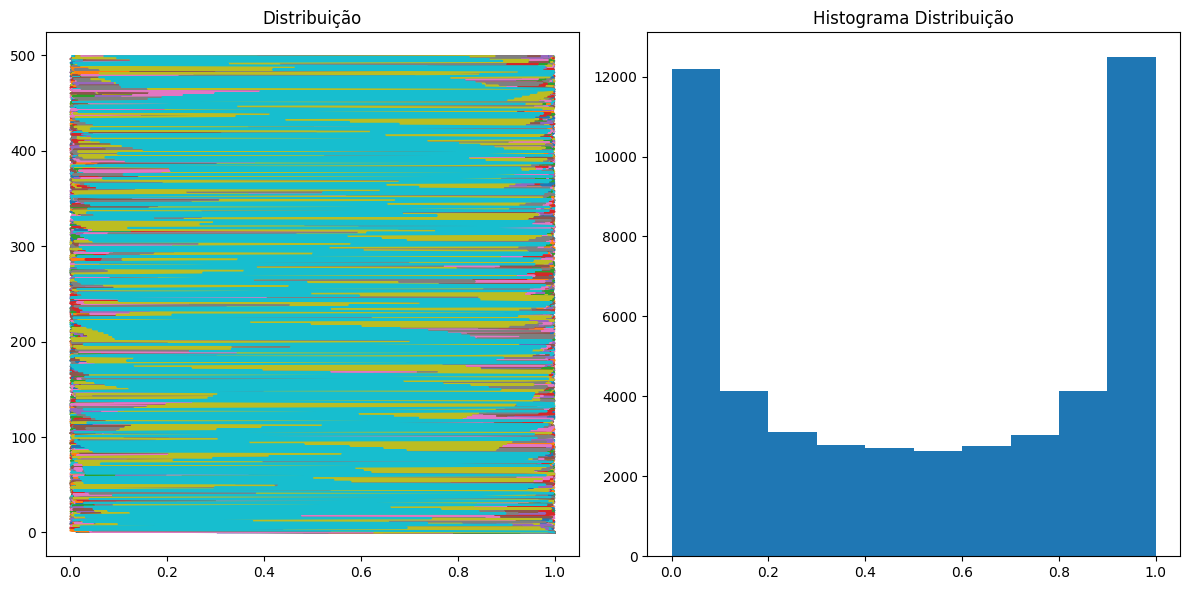

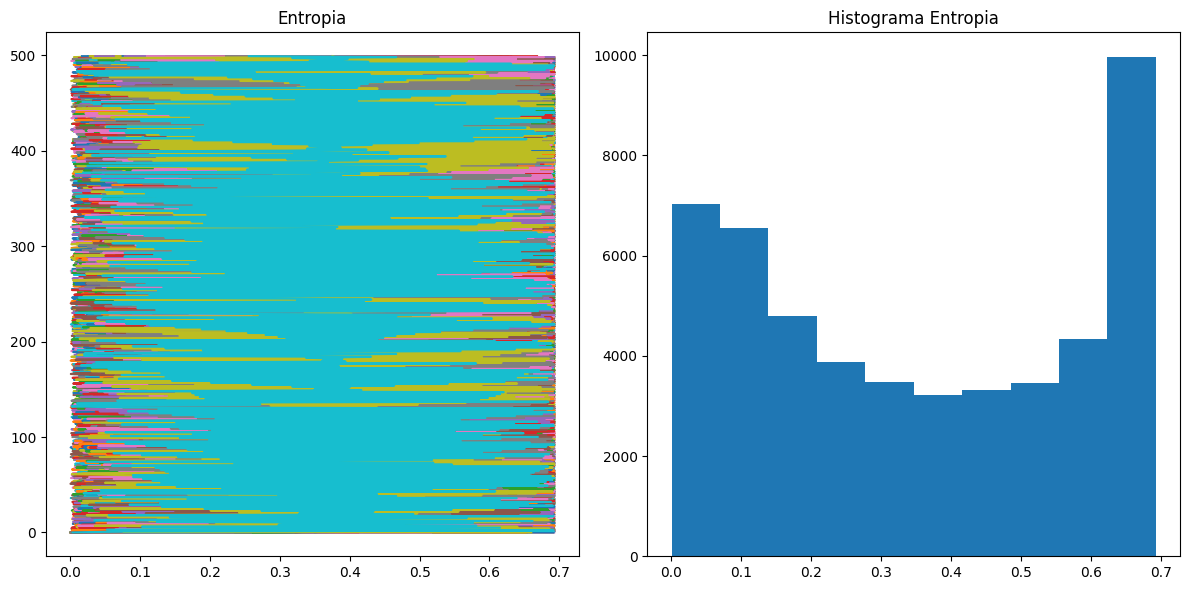

In [6]:
df = pd.read_csv('dados.csv')

lista = ['Iteração', 'Passo']
for i in df.columns:
    if i in lista:
        continue

    fig, ax = plt.subplots(1, 2, figsize = (12,6))
    for j in range(df['Iteração'].max() + 1):
        plot_df = df[df['Iteração'] == j][i].to_numpy()
        ax[0].plot(plot_df, range(500), label = 'seed ' + str(j))
        ax[0].set_title(i)

    ax[1].hist(df[i])
    ax[1].set_title('Histograma ' +i)
    plt.tight_layout()
    plt.show()

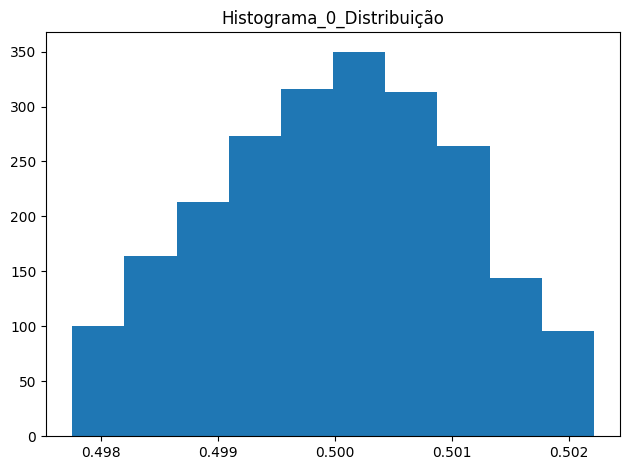

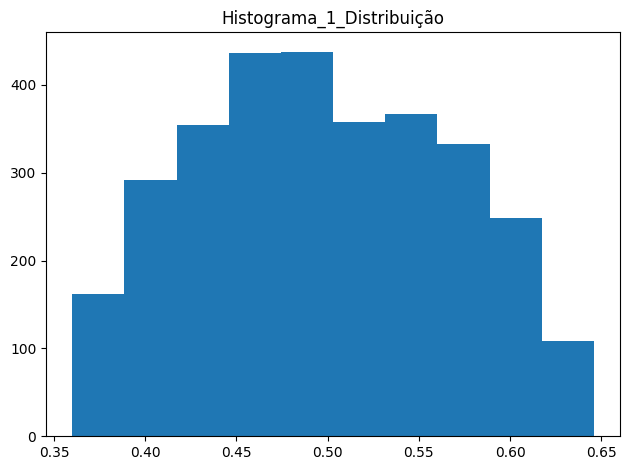

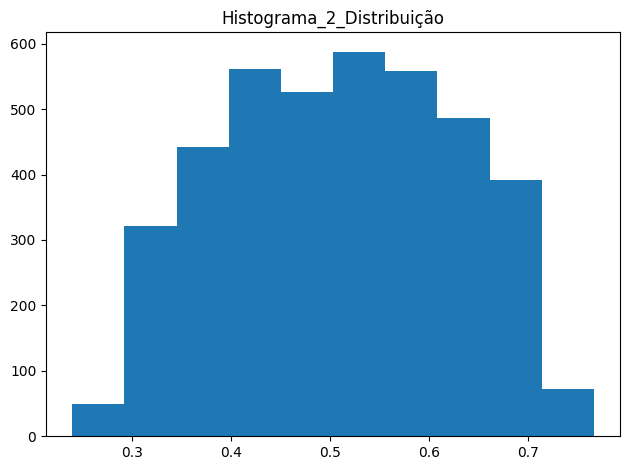

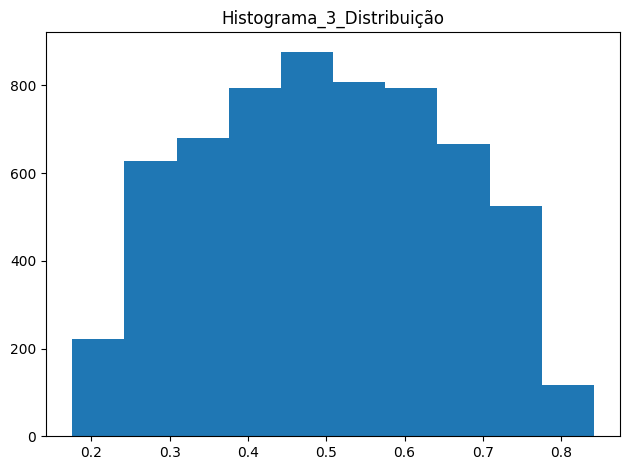

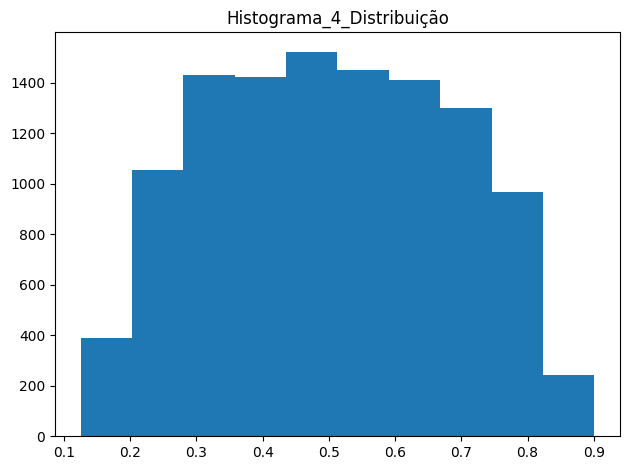

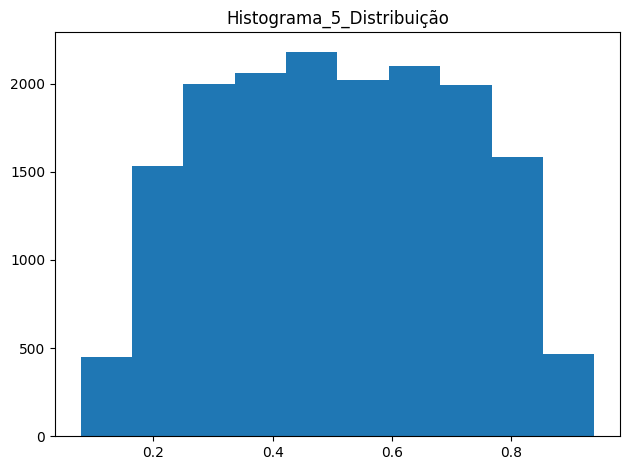

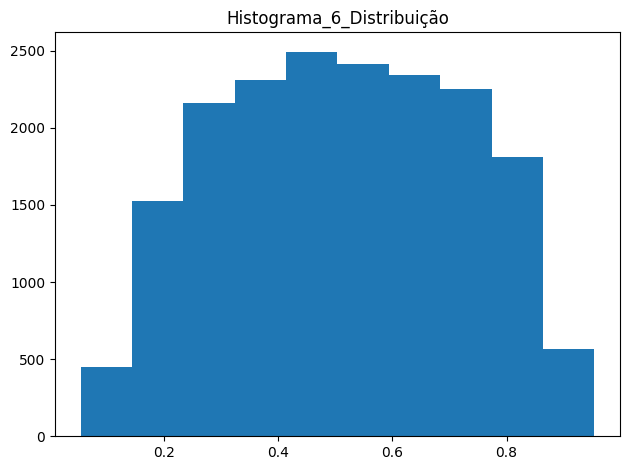

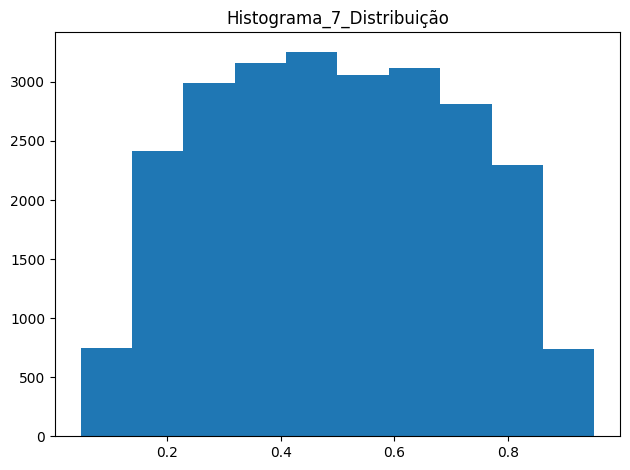

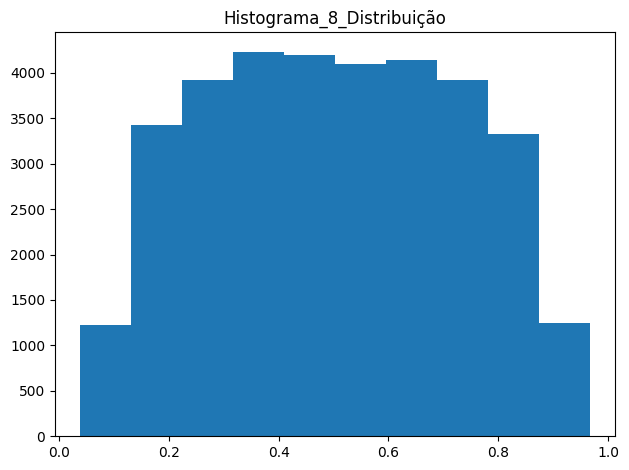

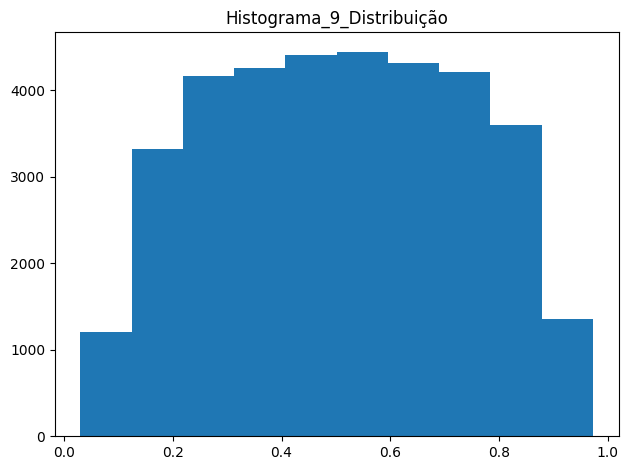

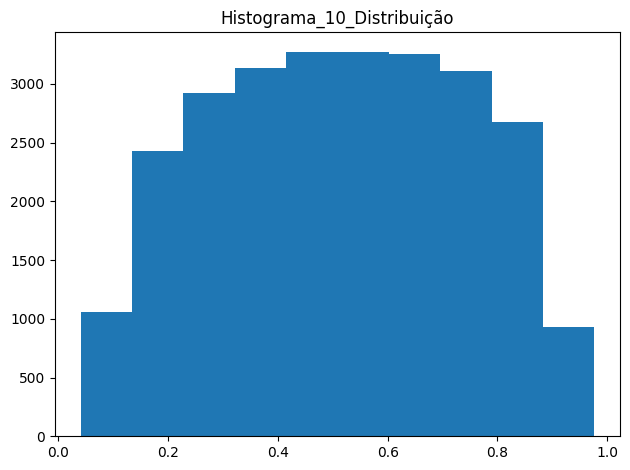

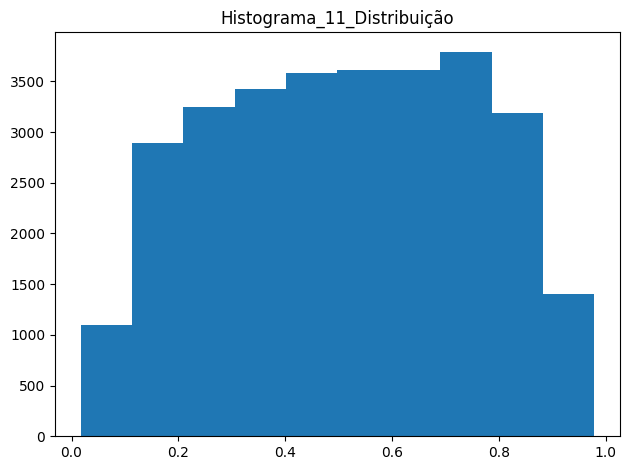

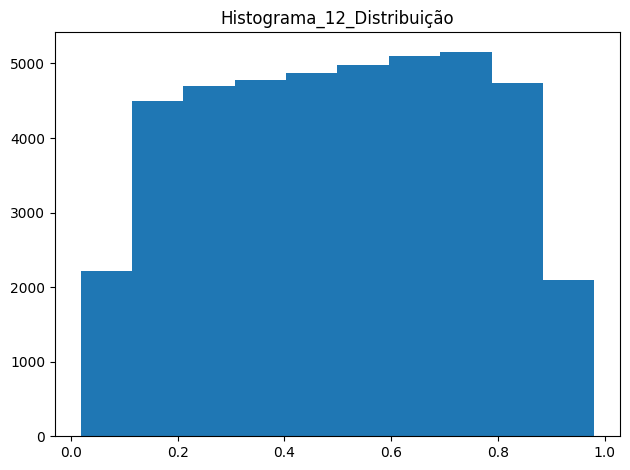

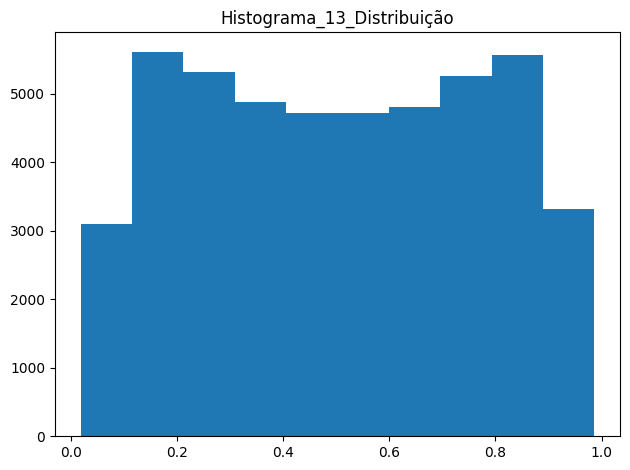

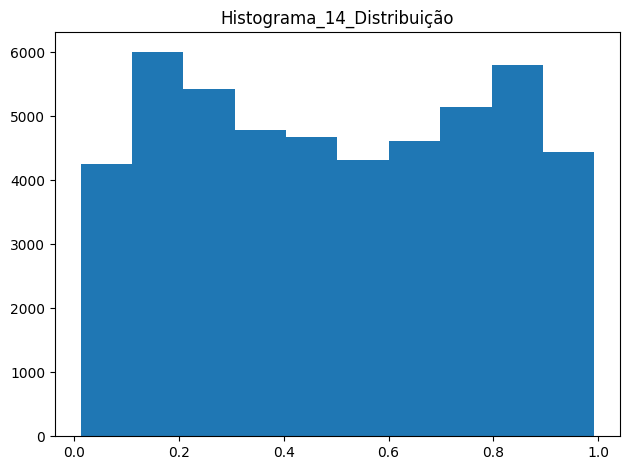

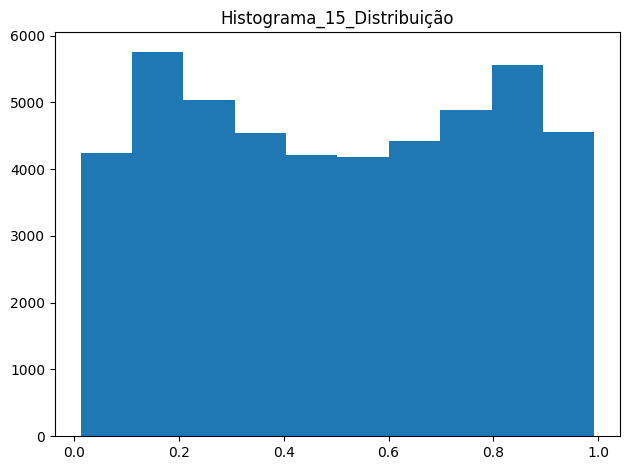

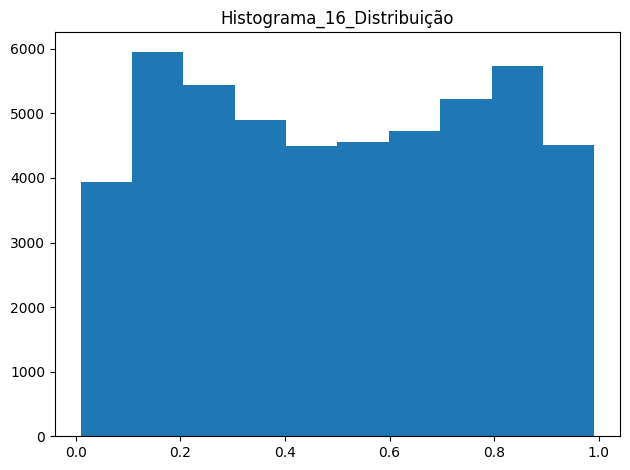

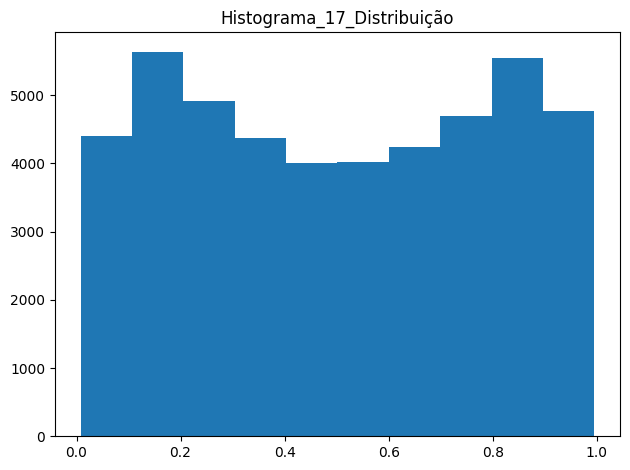

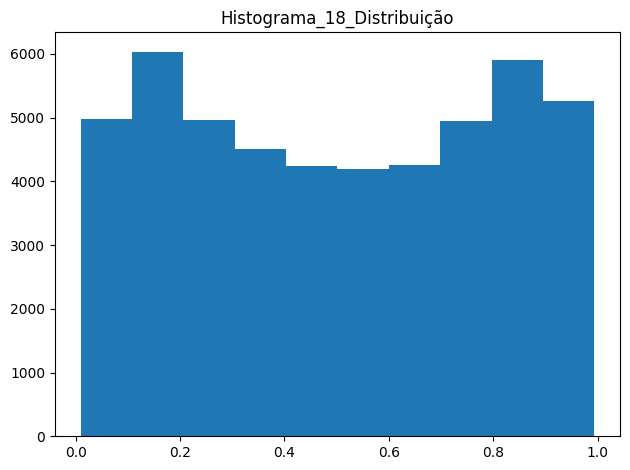

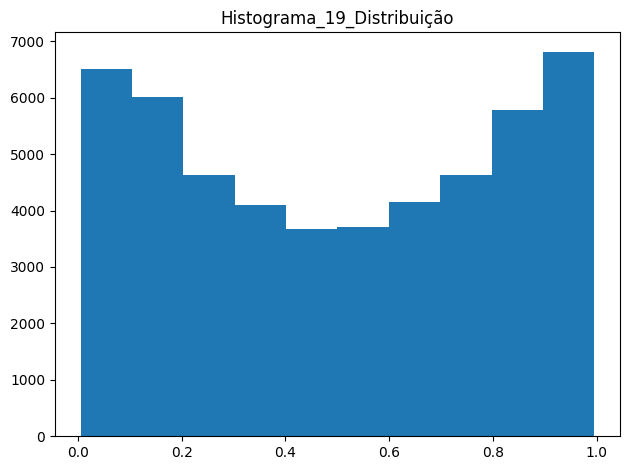

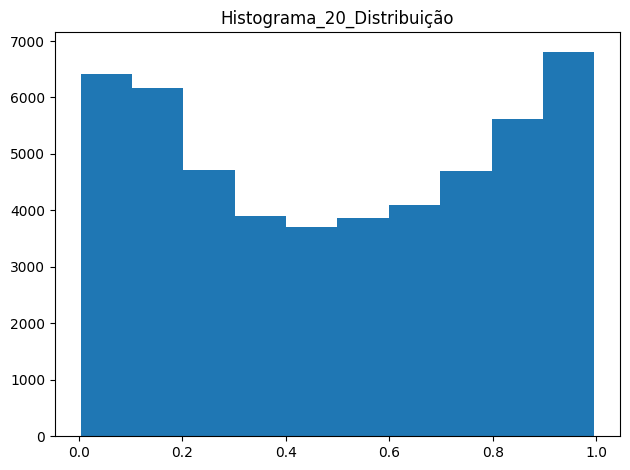

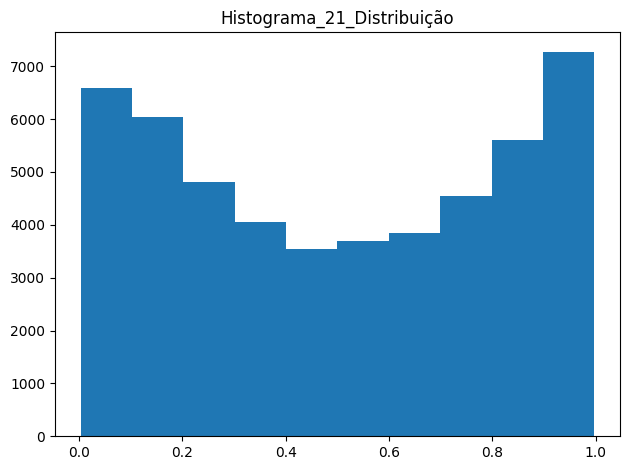

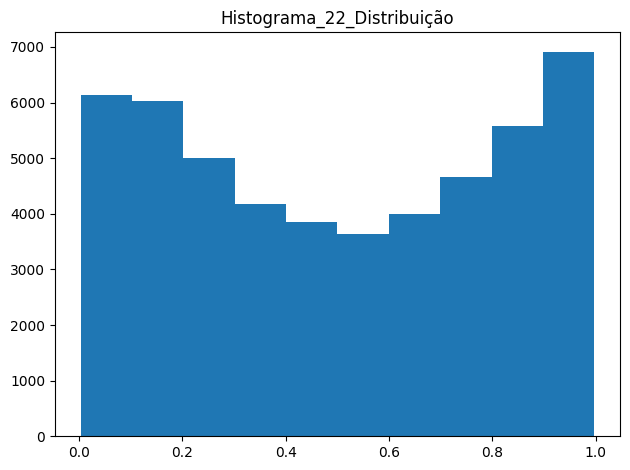

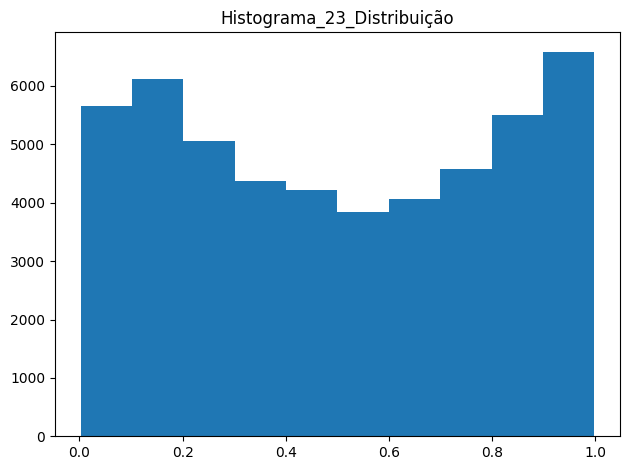

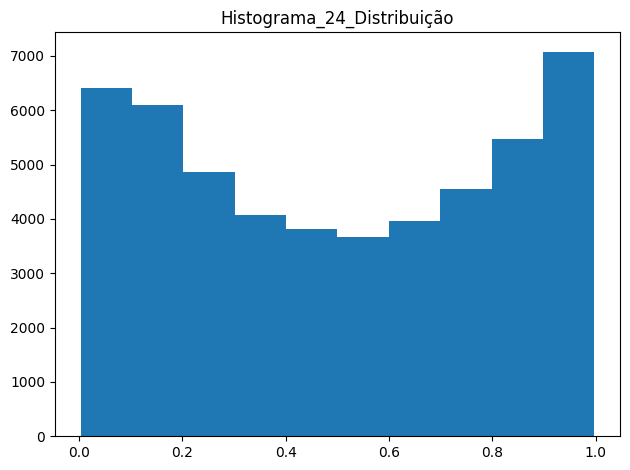

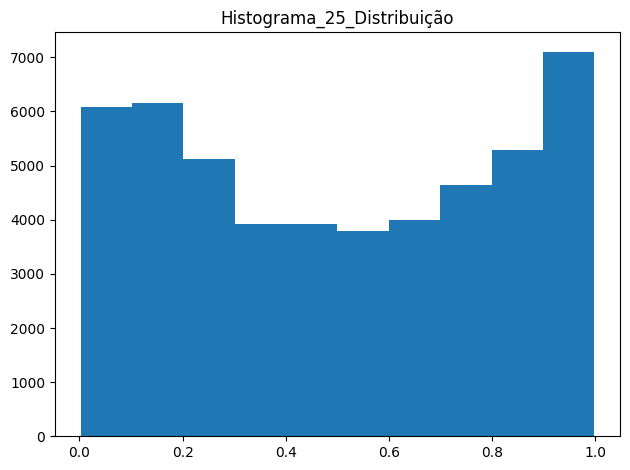

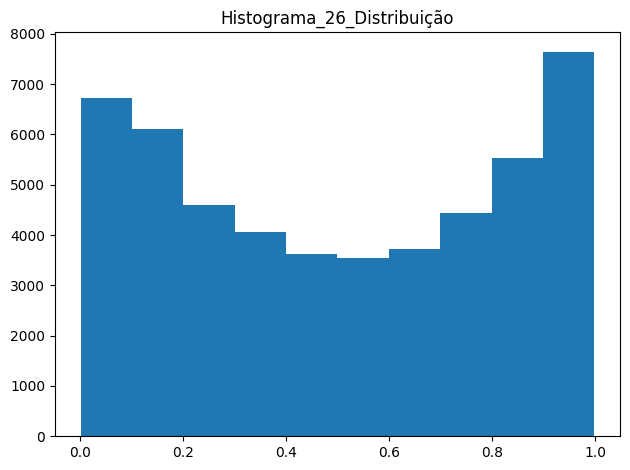

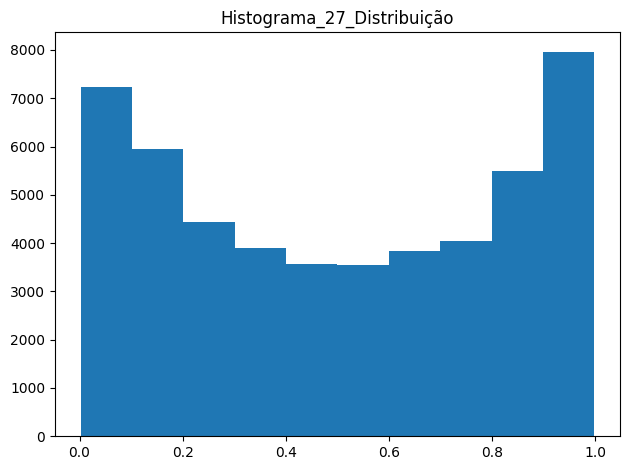

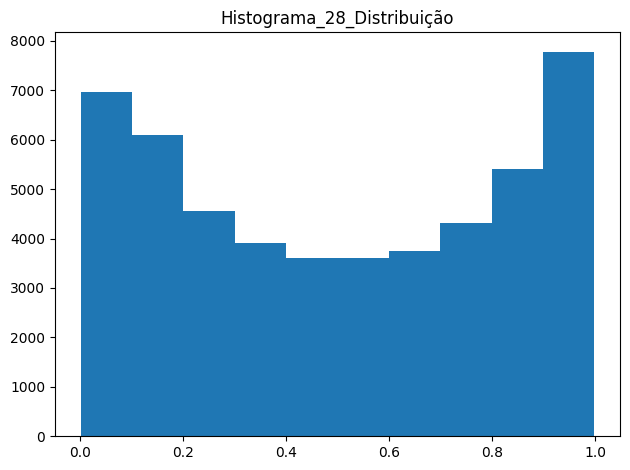

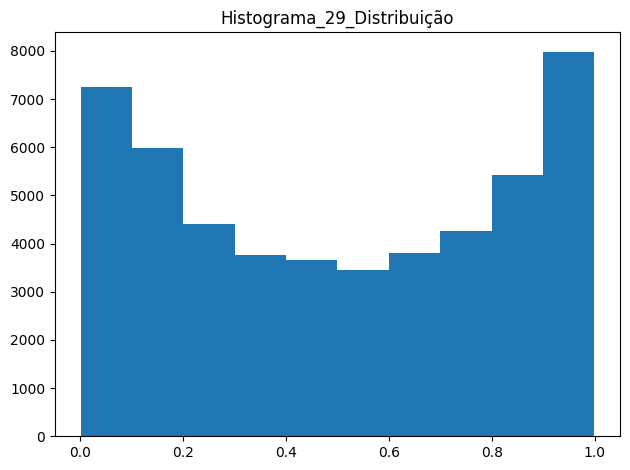

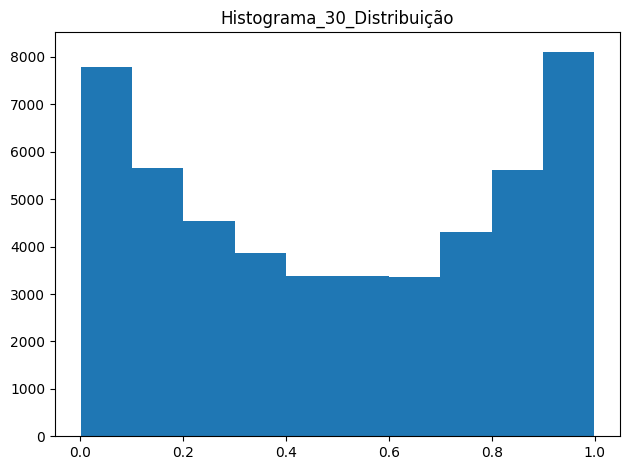

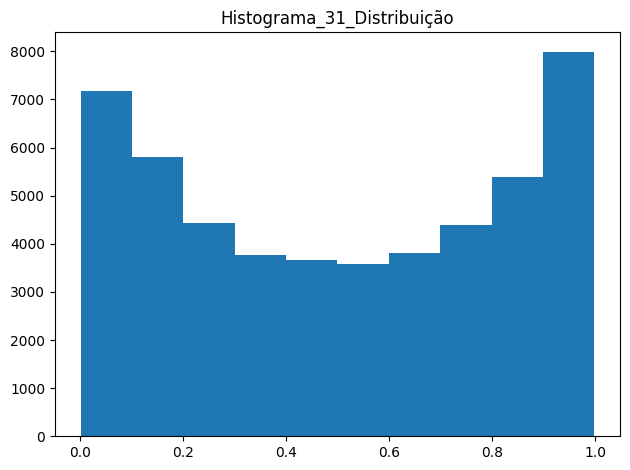

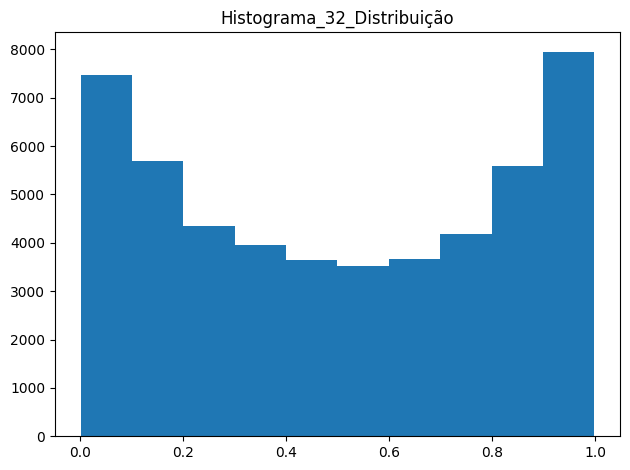

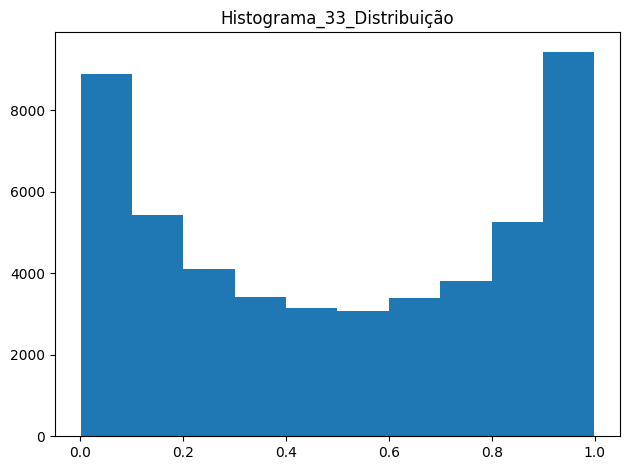

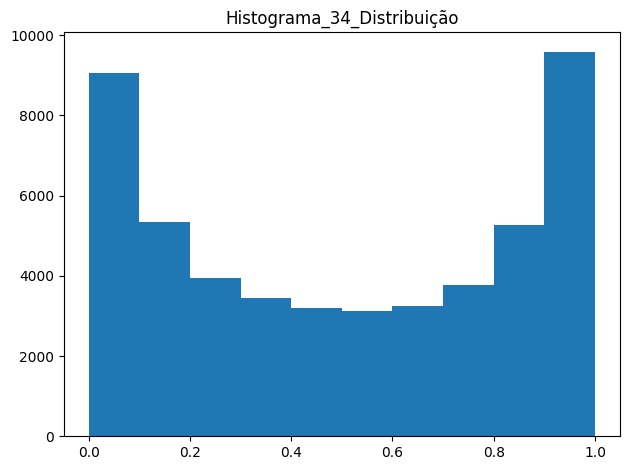

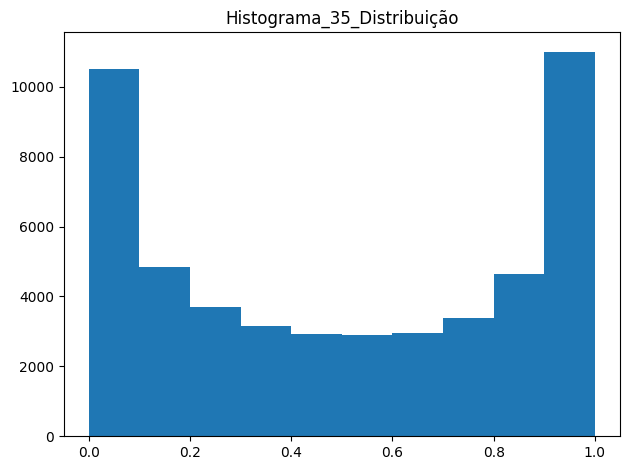

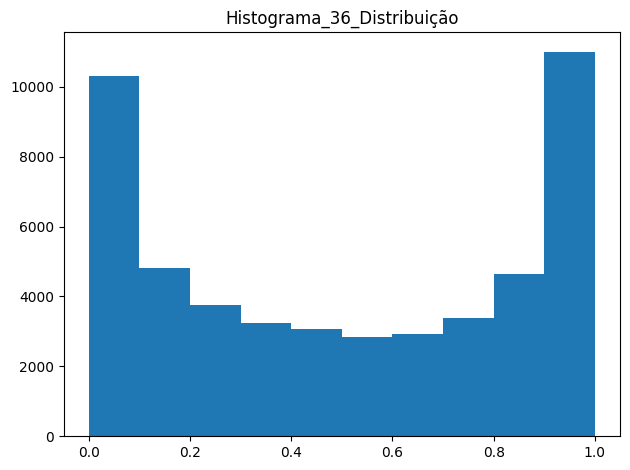

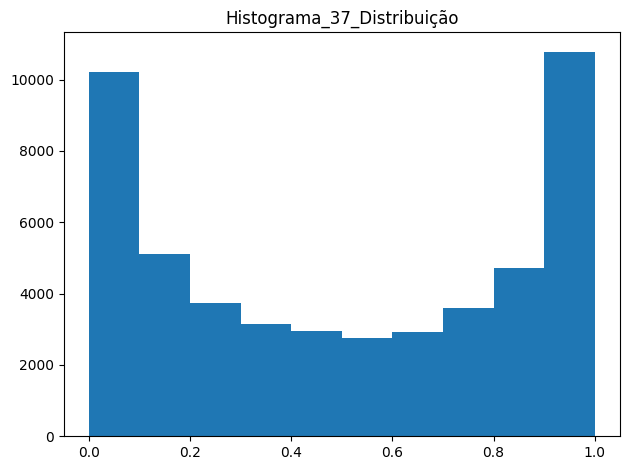

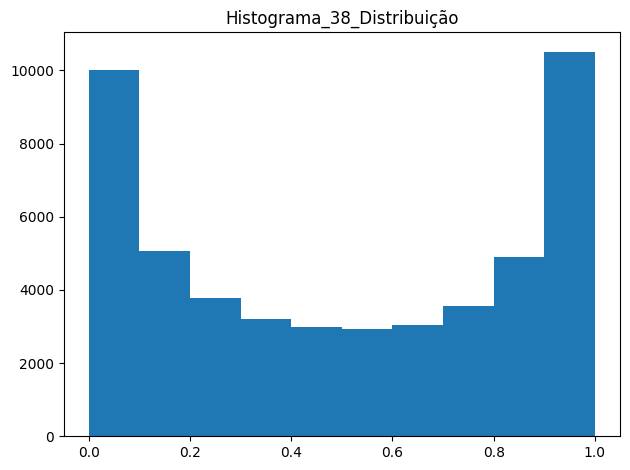

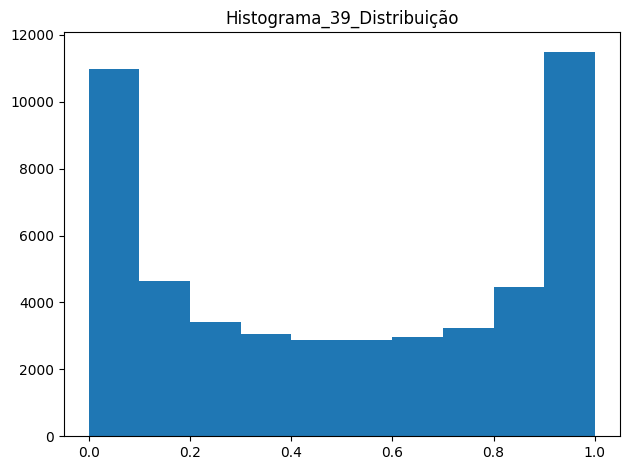

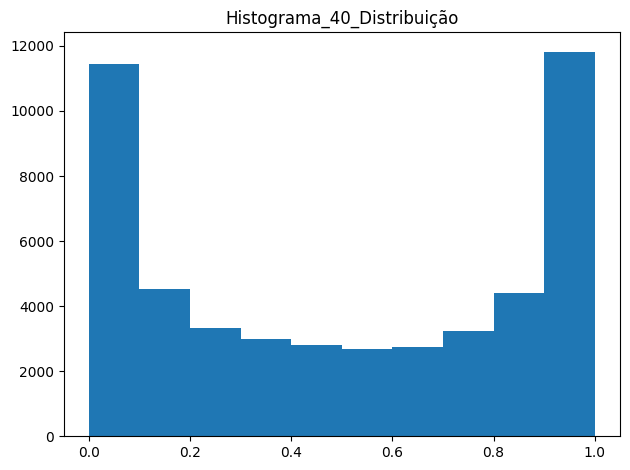

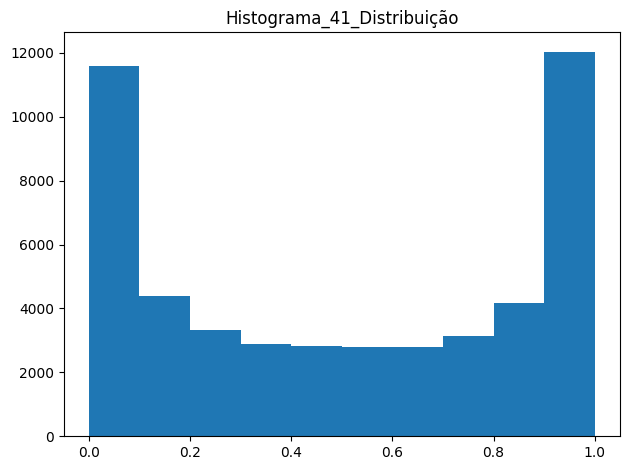

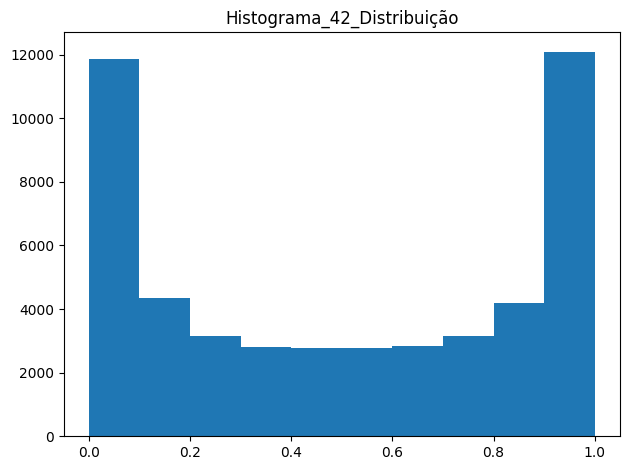

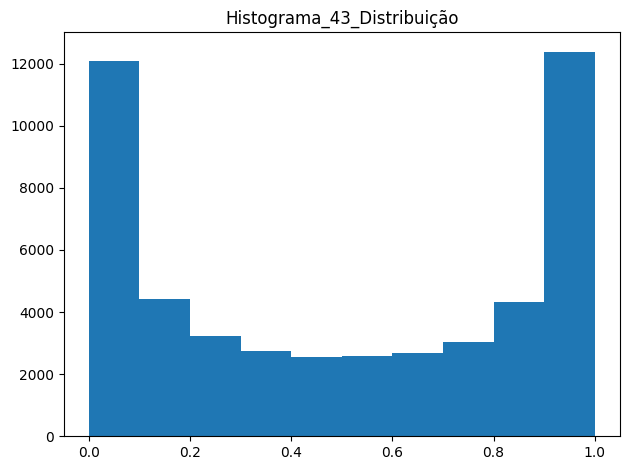

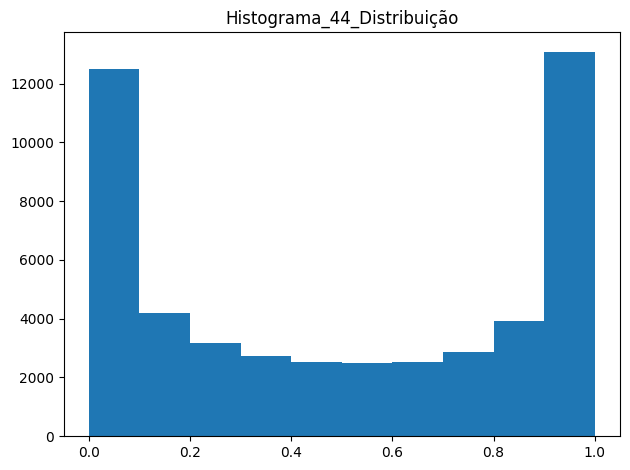

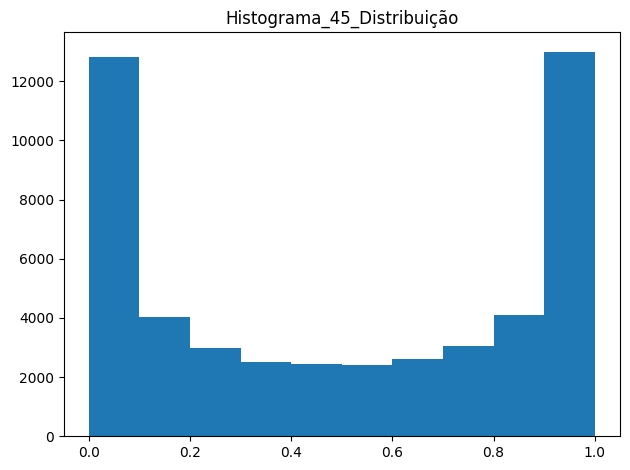

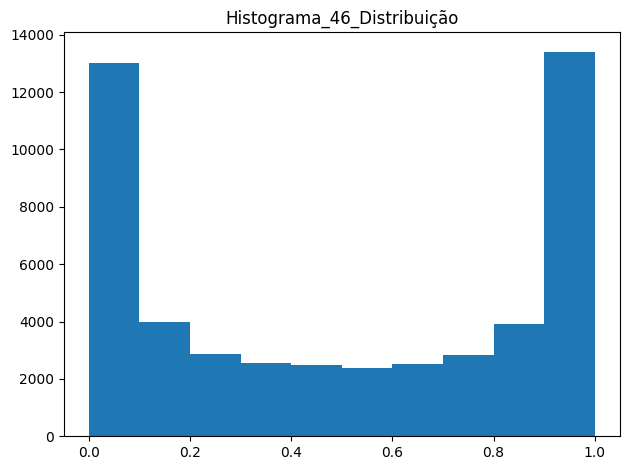

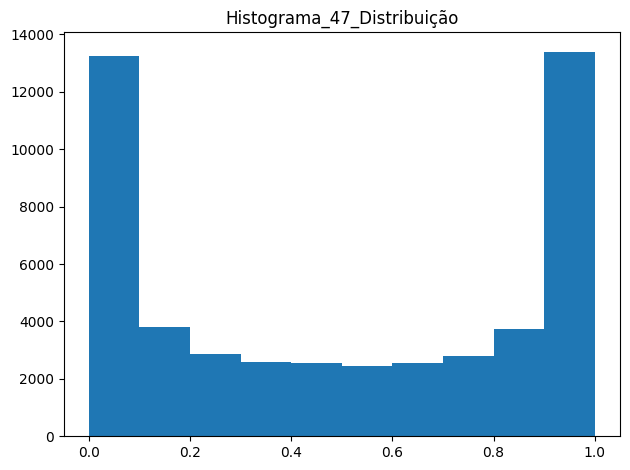

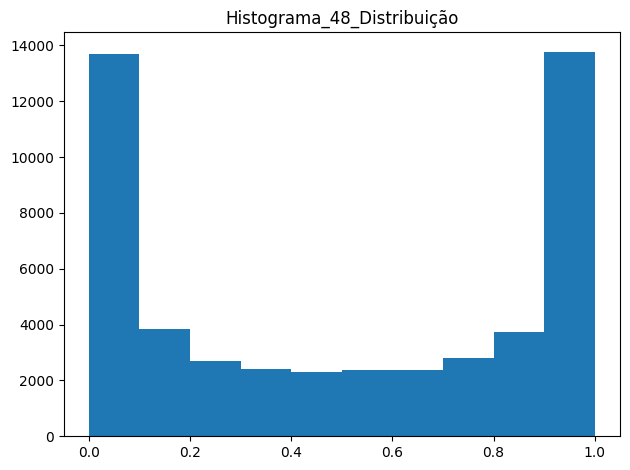

In [4]:
for j in range(49):
   df = pd.read_csv(f'Coleta/coleta_treino_{j}.csv')
   lista = ['Distribuição']
   for i in df.columns:
      if i in lista:
         plt.hist(df[i])
         plt.title(f'Histograma_{j}_{i}')
         plt.tight_layout()
         plt.show()
   else:
         continue

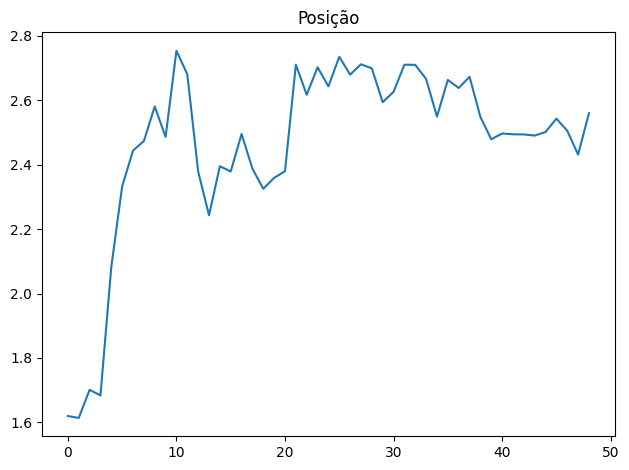

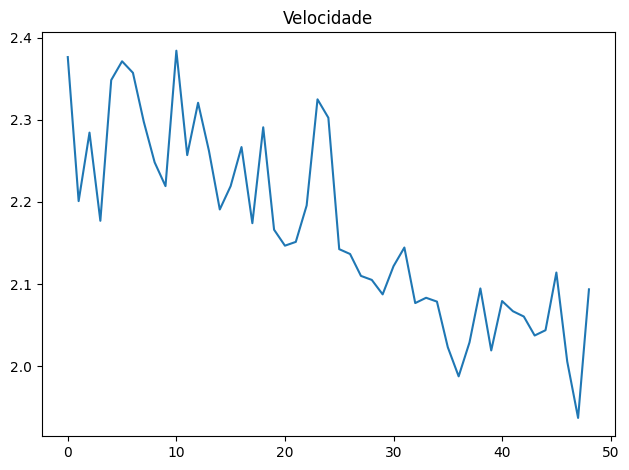

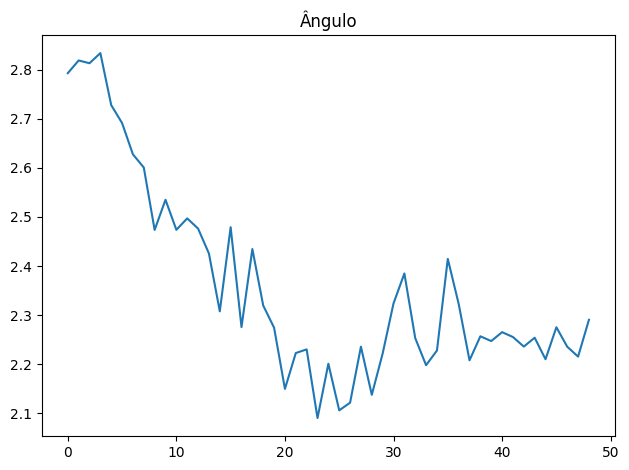

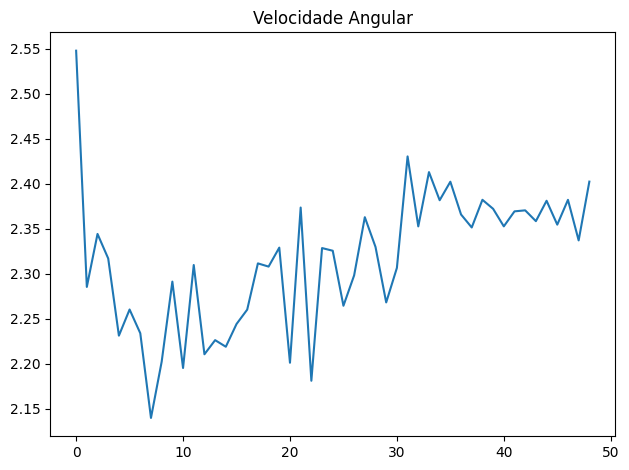

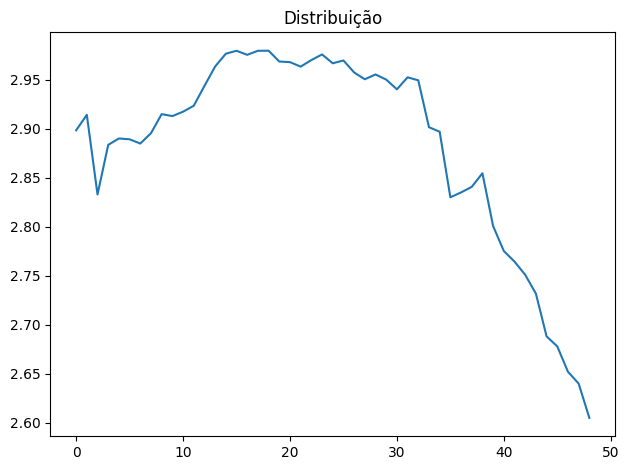

In [3]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy
import numpy as np

scaler = MinMaxScaler()
base = pd.read_csv(f'Coleta/coleta_treino_0.csv')
lista = ['Iteração', 'Passo', 'Entropia']
   
for i in base.columns:
    if i in lista:
        continue
      
    entropia = []
    for j in range(49):
        df = pd.read_csv(f'Coleta/coleta_treino_{j}.csv')
        df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
        counts, _ = np.histogram(df[i], bins=20, density=False)
        entropia.append(entropy(counts/df.shape[0]))

    plt.plot(entropia)
    plt.title(i)
    plt.tight_layout()
    plt.show()

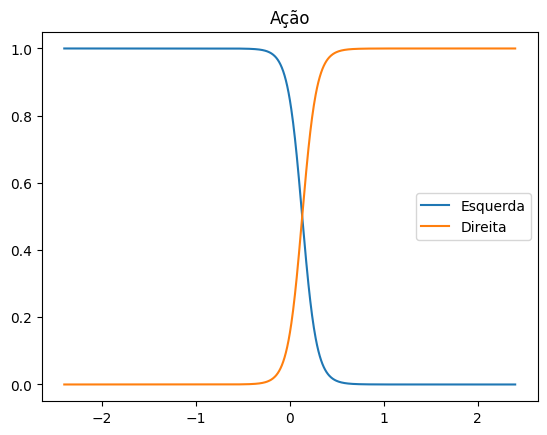

In [5]:
import numpy as np
value = np.zeros(1000)
dist = np.zeros((1000,2))
pos = np.linspace(-2.4, 2.4, 1000) #hã?
for i, j in enumerate(pos):
    tensor_obs = teste.model.policy.obs_to_tensor(np.array([j, 0, 0, 0]))[0]
    value[i] = teste.model.policy.predict_values(tensor_obs)[0,0].detach().numpy()
    dist[i] = teste.model.policy.get_distribution(tensor_obs).distribution.probs[0].clone().detach().cpu().numpy()

plt.plot(pos, dist)
plt.title('Ação')
plt.legend(['Esquerda', 'Direita'])
plt.show()

# Rota value: Confiabilidade

In [13]:
# Visualização
import gymnasium
import keyboard
import matplotlib.pyplot as plt
import numpy as np
from utils import fib

env = gymnasium.make('CartPole-v1')
modelo = teste.model

seeds = fib(2)
position = np.zeros((len(seeds), 500, 4))
modelo.set_random_seed(0)
for i, seed in enumerate(seeds):
    j = 0
    obs = env.reset(seed=seed)[0]
    done = False
    while not done:
        action, _ = modelo.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        position[i,j] = obs
        done = terminated or truncated
        j += 1
        if keyboard.is_pressed('esc'):
            break
    env.close()

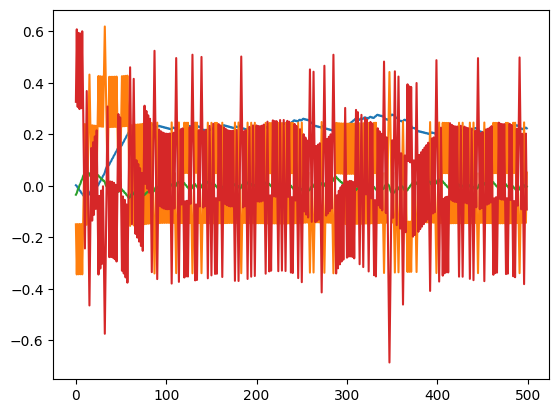

In [14]:
# o plano era fazer a evolução dos parâmetros ao longo do tempo, mas n deu mt certo n
plt.plot(position[0,:,:])
plt.show()

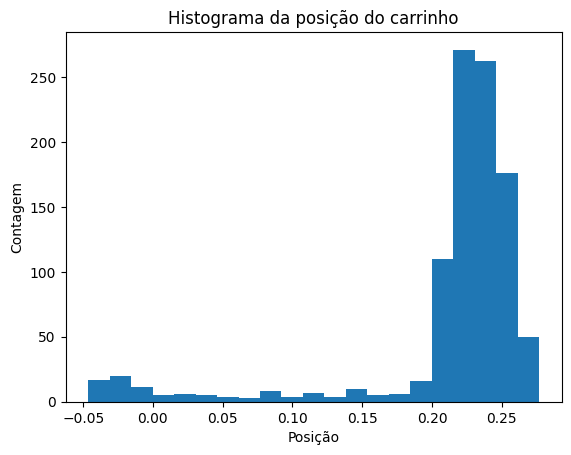

In [15]:
clear_position = np.array(position[:,:,0]).reshape(-1)
counts, bins = np.histogram(clear_position, bins=20, density=False)

# for i in position:
#     plt.plot(i, np.arange(1,501))

plt.hist(clear_position, bins.size)
plt.xlabel('Posição')
plt.ylabel('Contagem')
plt.title('Histograma da posição do carrinho')
plt.show()

## Usando LQR

Threshold reached after 500 iterations.


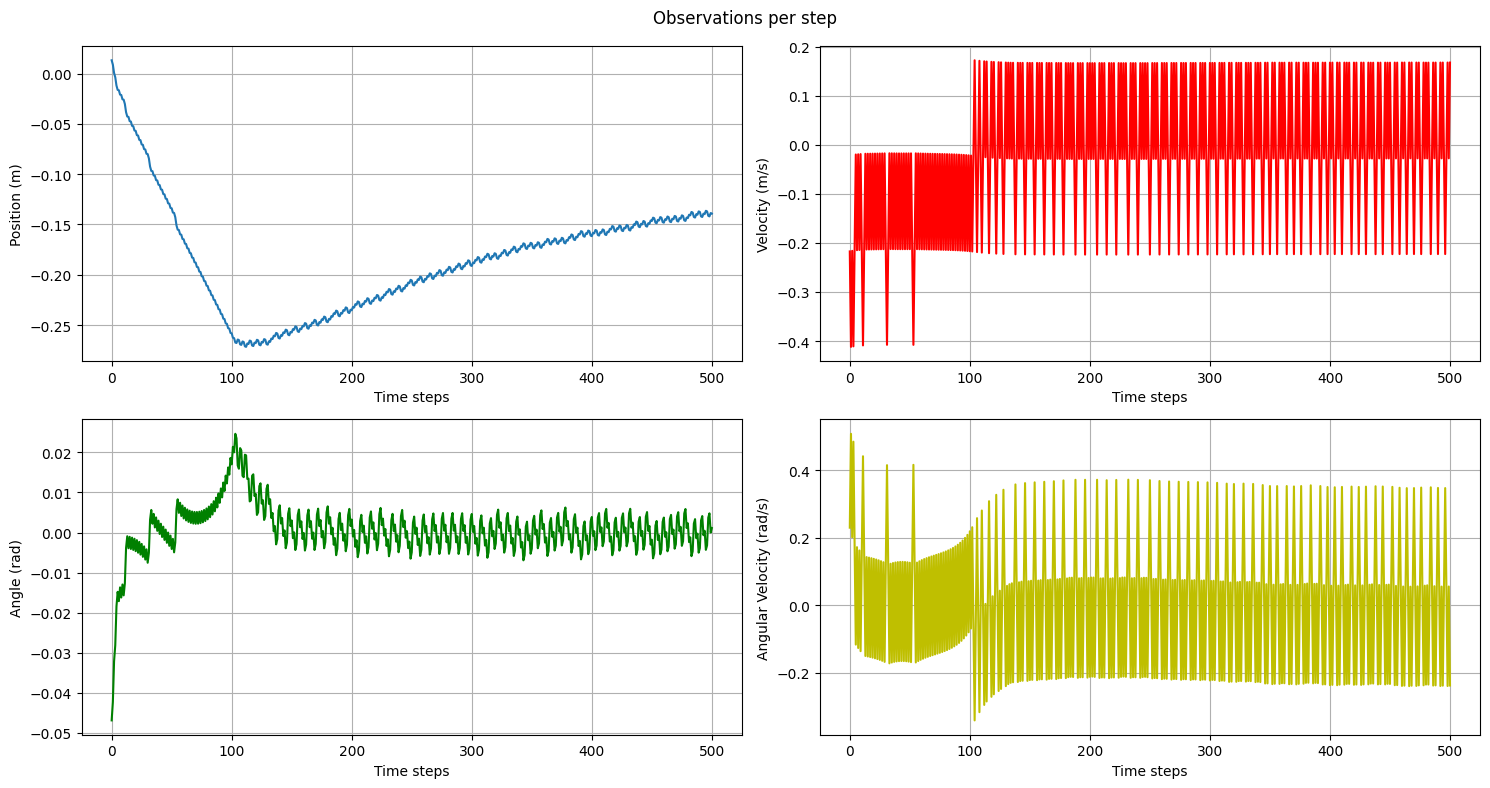

In [16]:
# code from https://github.com/JoKoum/reinforcement-learning-vs-control-theory/blob/master/cartpole_control_theory.py

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import gymnasium

class Controller:
    '''Implements a feedback controller'''
    def __init__(self, environment):
        # gravity
        self.g = 10
        # pole length
        self.lp = environment.env.get_wrapper_attr('length')
        # pole mass
        self.mp = environment.env.get_wrapper_attr('masspole')
        # cart mass
        self.mk = environment.env.get_wrapper_attr('masscart')
        # total mass
        self.mt = environment.env.get_wrapper_attr('total_mass')
        
    def state_controller(self):
        # state matrix
        a = self.g/(self.lp*(4.0/3 - self.mp/(self.mp+self.mk)))
        A = np.array([[0, 1, 0, 0],
              [0, 0, a, 0],
              [0, 0, 0, 1],
              [0, 0, a, 0]])
              
        # input matrix
        b = -1/(self.lp*(4.0/3 - self.mp/(self.mp+self.mk)))
        B = np.array([[0], [1/self.mt], [0], [b]])
        
        # choose R (weight for input)
        R = np.eye(1, dtype=int)
        # choose Q (weight for state)
        Q = 5*np.eye(4, dtype=int)
        
        # solve ricatti equation
        P = linalg.solve_continuous_are(A, B, Q, R)     #! Tem algo aqui que crasha o kernel
        
        # calculate optimal controller gain
        K = np.dot(np.linalg.inv(R), np.dot(B.T, P))

        return K
        
    def apply_state_controller(self, x):
        K = self.state_controller()
        # feedback controller
        u = -np.dot(K, x)[0]   # u = -Kx
        if u > 0:
            return 1, u     # if force_dem > 0 -> move cart right
        else:
            return 0, u     # if force_dem <= 0 -> move cart left

def run_experiment(rounds = 1000):
    '''Perform an experiment. Control the cart-pole system'''
    # get environment
    env = gymnasium.make('CartPole-v1', render_mode = 'human')
    obs = env.reset(seed= 0)[0]

    controller = Controller(env)

    position_list = []
    velocity_list = []
    angle_list = []
    angular_velocity_list = []
    steps = []
    flag = True
    
    for i in range(rounds):        
        # get force direction (action) and force value (force)
        action, _ = controller.apply_state_controller(obs)
        
        #absolute value, since 'action' determines the sign, F_min = -10N, F_max = 10N
        # abs_force = abs(float(np.clip(force, -10, 10)))
        
        # change magnitute of the applied force in CartPole
        # env.env.force_mag = abs_force
        
        # apply action
        obs, reward, terminated, truncated, info = env.step(action)

        
        # store state, time
        position_list.append(obs[0])
        velocity_list.append(obs[1])
        angle_list.append(obs[2])
        angular_velocity_list.append(obs[3])
        steps.append(i)
        
        done = terminated or truncated

        if done and flag:
            print(f'Threshold reached after {i+1} iterations.')
            flag = False
        if i > 499:
            break
        
    env.close()
    
    fig, ax = plt.subplots(2,2, figsize=(15,8))
    ax[0][0].plot(steps, position_list)
    ax[0][0].set_xlabel('Time steps')
    ax[0][0].set_ylabel('Position (m)')
    ax[0][0].grid()
    
    ax[0][1].plot(steps, velocity_list, 'r')
    ax[0][1].set_xlabel('Time steps')
    ax[0][1].set_ylabel('Velocity (m/s)')
    ax[0][1].grid()
    
    ax[1][0].plot(steps, angle_list, 'g')
    ax[1][0].set_xlabel('Time steps')
    ax[1][0].set_ylabel('Angle (rad)')
    ax[1][0].grid()
    
    ax[1][1].plot(steps, angular_velocity_list, 'y')
    ax[1][1].set_xlabel('Time steps')
    ax[1][1].set_ylabel('Angular Velocity (rad/s)')
    ax[1][1].grid()
    
    plt.suptitle('Observations per step')
    plt.tight_layout()
    plt.show()
run_experiment()

# Comparativo pra múltiplas seeds

In [6]:
#todo: indicar qual gradiente pertece a qual camada automaticamente -> net diferente de 2 camadas
def plot_mi(indice: int = 0):
    direc = 'resultados.csv'
    data = pd.read_csv(direc)
    drop_list = ['n_updates', 'learning_rate', 'range']
    for i in drop_list:
        data.drop(data.filter(like = i), axis= 1, inplace= True) #type: ignore
    loss_data = data.filter(like= 'loss')
    grad_data = data.filter(like= 'layer')
    mutual_data = data.filter(like = 'mutual')
    data.drop(loss_data, axis = 1, inplace= True) #type: ignore
    data.drop(grad_data, axis = 1, inplace= True) #type: ignore
    data.drop(mutual_data, axis = 1, inplace= True) #type: ignore

    loss_data.plot(title= 'Loss', figsize = (8,5))
    plt.tight_layout()
    plt.savefig(f'Plots/loss_seed_{indice}.jpg')
    plt.close()

    indice_policy = [0,1,2,3,8,9]
    indice_value = [4,5,6,7,10,11]
    policy_data = grad_data.filter(items=[f'train/gradient_layer_{i}' for i in indice_policy])
    value_data = grad_data.filter(items=[f'train/gradient_layer_{i}' for i in indice_value])

    lista = [['train/mutual_info_0','train/mutual_info_2', 'I(Input, 1st Layer)', 'I(1st Layer, 2nd Layer)', 'In-1st-2nd'], 
            ['train/mutual_info_0','train/mutual_info_3', 'I(Input, 1st Layer)', 'I(1st Layer, Output)', 'In-1st-Out'], 
            ['train/mutual_info_1','train/mutual_info_4', 'I(Input, 2nd Layer)', 'I(2nd Layer, Output)', 'Input-2nd-Out'],
            ['train/mutual_info_2','train/mutual_info_4', 'I(1st Layer, 2nd Layer)', 'I(2nd Layer, Output)', '1st-2nd-Out']]

    #? valor arbirário pra indicar convergência, como fazer algo mais adaptativo?
    limit = np.where(loss_data['train/loss'] < 0.25)[0][0]

    for i in lista:   
        # Vou deixar o dado completo e o separado 
        plt.scatter(x= mutual_data[i[0]],y= mutual_data[i[1]], c= np.arange(0, len(mutual_data['train/mutual_info_0'])), cmap= 'magma')
        plt.xlabel(i[2])
        plt.ylabel(i[3])
        plt.colorbar(label='Épocas')
        plt.tight_layout()
        plt.savefig(f'Plots/{i[4]}_seed_{indice}.jpg')
        plt.close()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
    # Plotando os dados no primeiro subplot
    ax1.plot(policy_data)
    ax1.set_title('Gradient evolution Policy Net')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Gradient norm')
    ax1.legend(['W_entrada', 'B_entrada',
                'W_inter', 'B_inter',
                'W_saída', 'B_saída'
                ])

    # Plotando os dados no segundo subplot
    ax2.plot(value_data)
    ax2.set_title('Gradient evolution Value Net')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Gradient norm')
    ax2.legend(['W_entrada', 'B_entrada',
                'W_inter', 'B_inter',
                'W_saída', 'B_saída'
                ])
    plt.tight_layout()
    plt.savefig(f'Plots/Grad_evolution_seed_{indice}.jpg')
    plt.close()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import Experimento, alerta

params = {
    'env_id': 'CartPole-v1',
    'n_envs': 1,
    'size': [64, 64],
    'fib_seeds': [0],
    'timesteps': int(1e5),
    'recording': False,
    'device': 'cpu',
    'n_steps': 1024,
    'vf_coef': 1,
    'ent_coef': 1,
    'coleta': False
}

for i in range(100):
    params['fib_seeds'] = [i]
    teste = Experimento(params)
    teste.treinamento()
    plot_mi(i)
alerta()

Done.
